In [1]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

from sklearn import svm

import cv2
import numpy as np

In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


In [3]:
def HogFun(path):
    # Reading image BGR
    img_1=cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # print(np.shape(Symbol_Binary))
    # Show Images
#     print(np.shape(img_1))


    # resizing image
    resized_img_1 = resize(img_1, (128*4, 64*4))
    # plt.axis("off")
    # plt.imshow(resized_img)
    # print(resized_img.shape)


    #creating hog features
    fd_1, hog_image_1 = hog(resized_img_1, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=False)
    show_images([img_1,resized_img_1,hog_image_1],["Gray","Resized","hog_image"])
    # Fd Faeture
#     print(np.shape(fd_1))
    return fd_1,hog_image_1


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


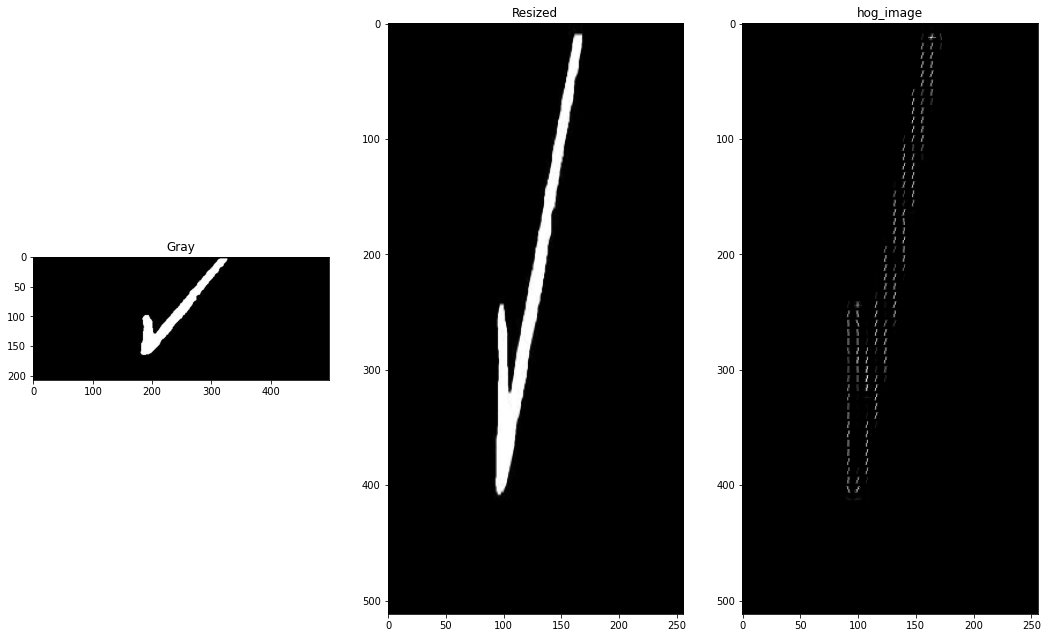

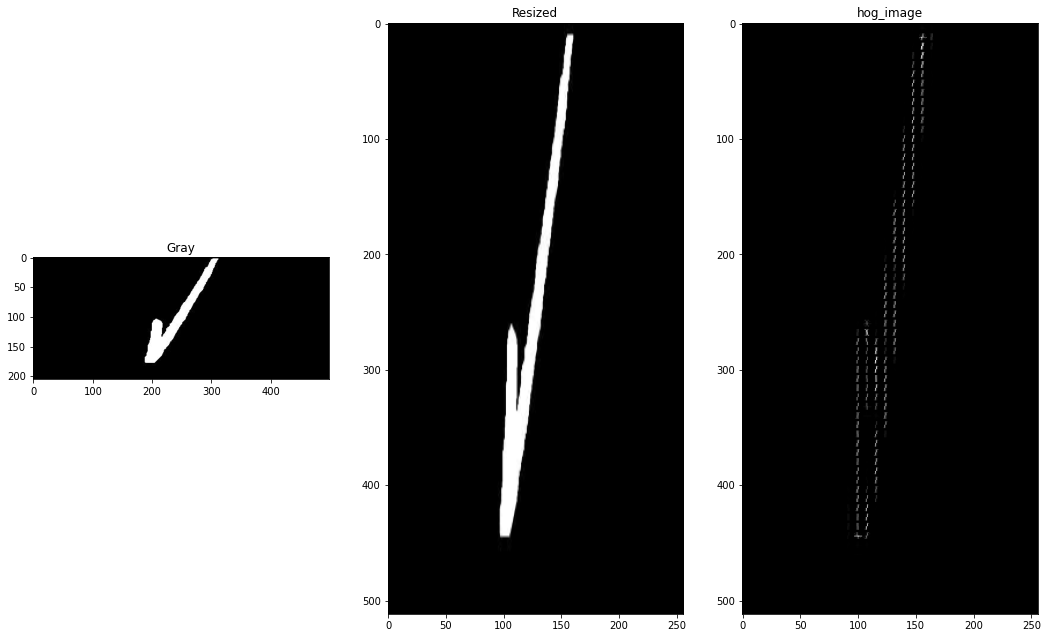

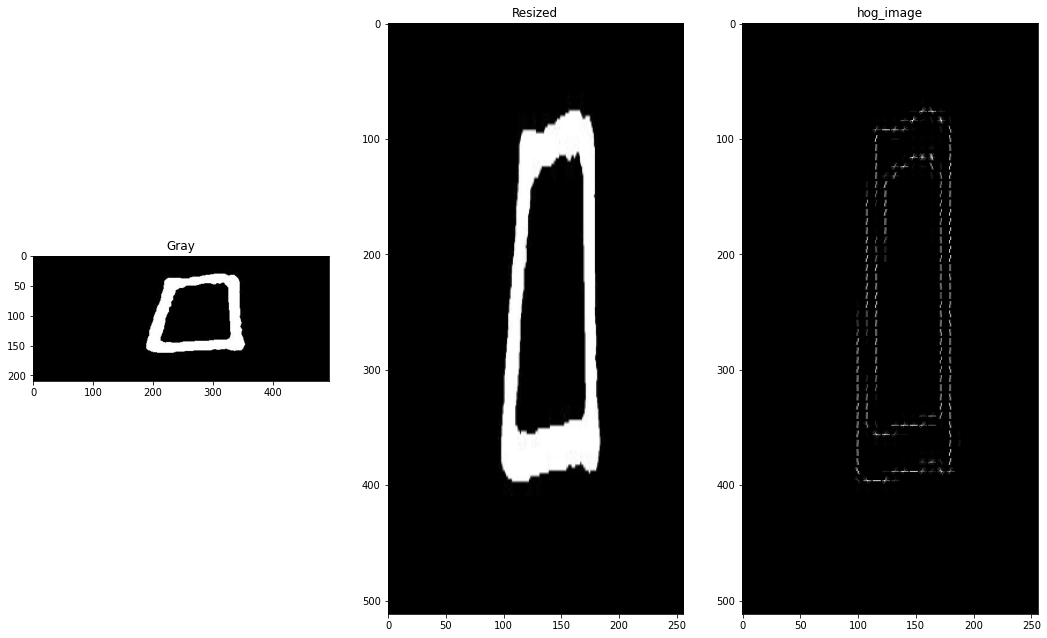

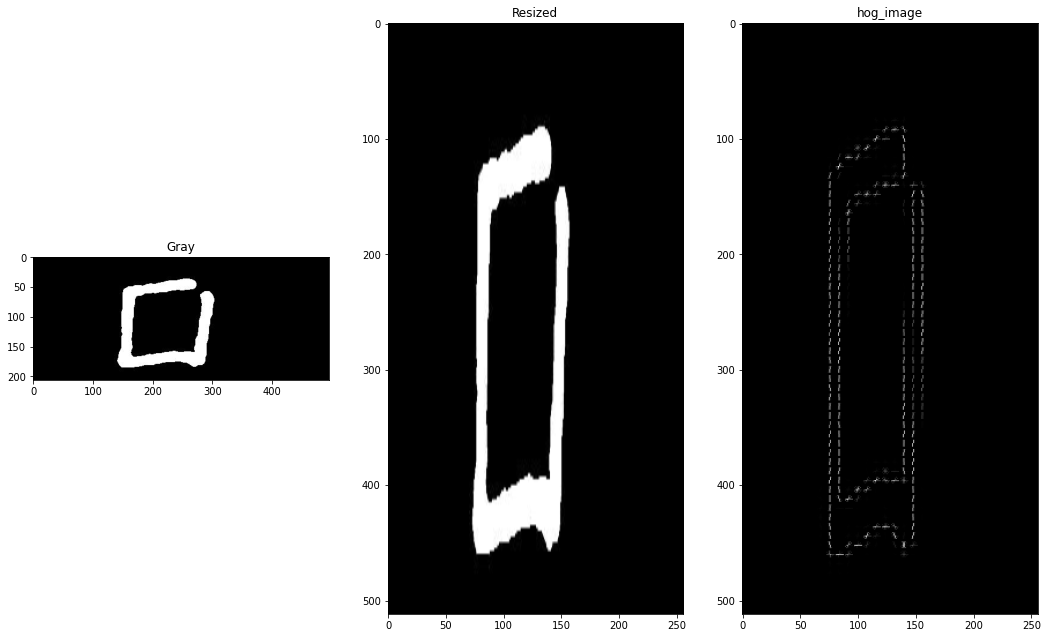

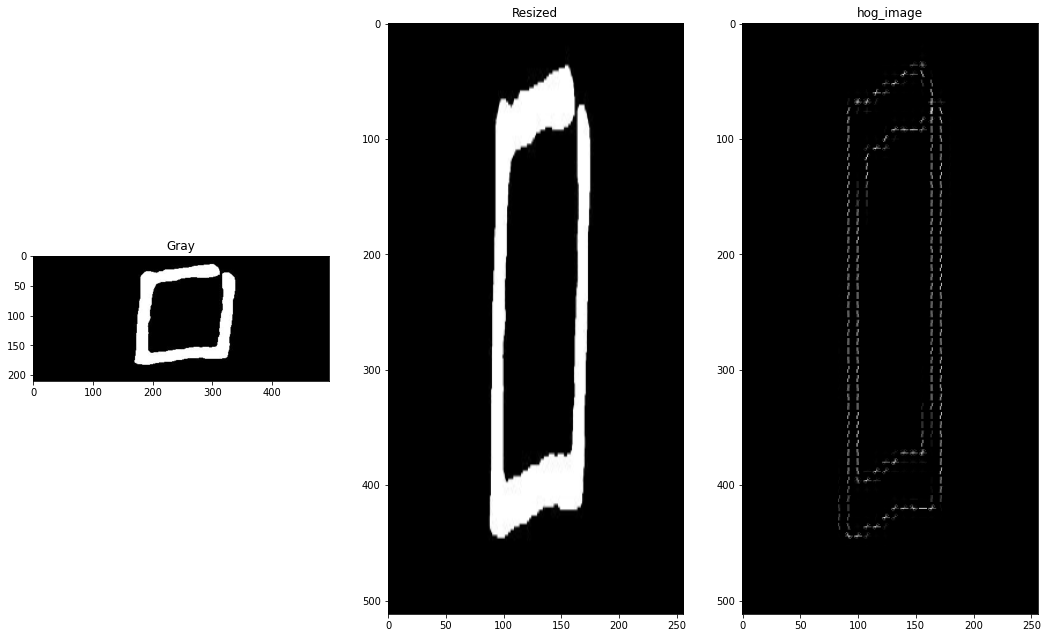

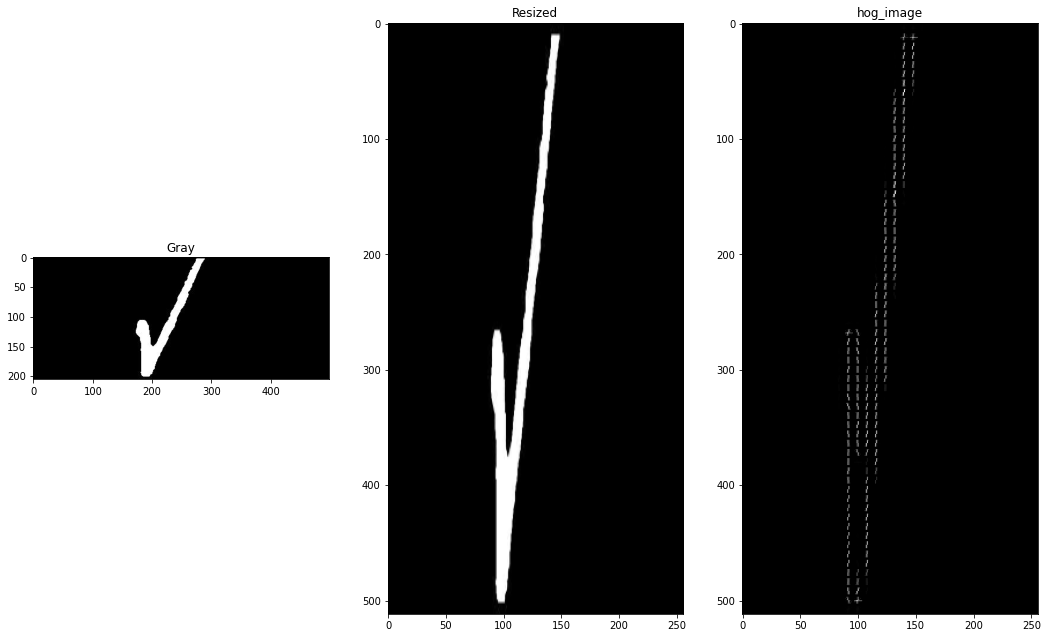

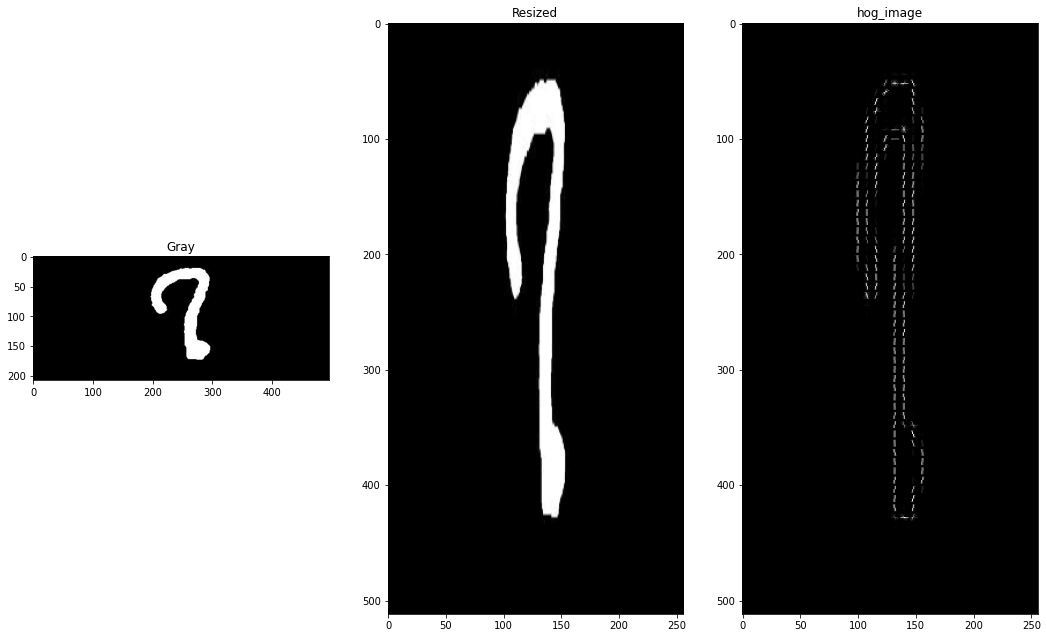

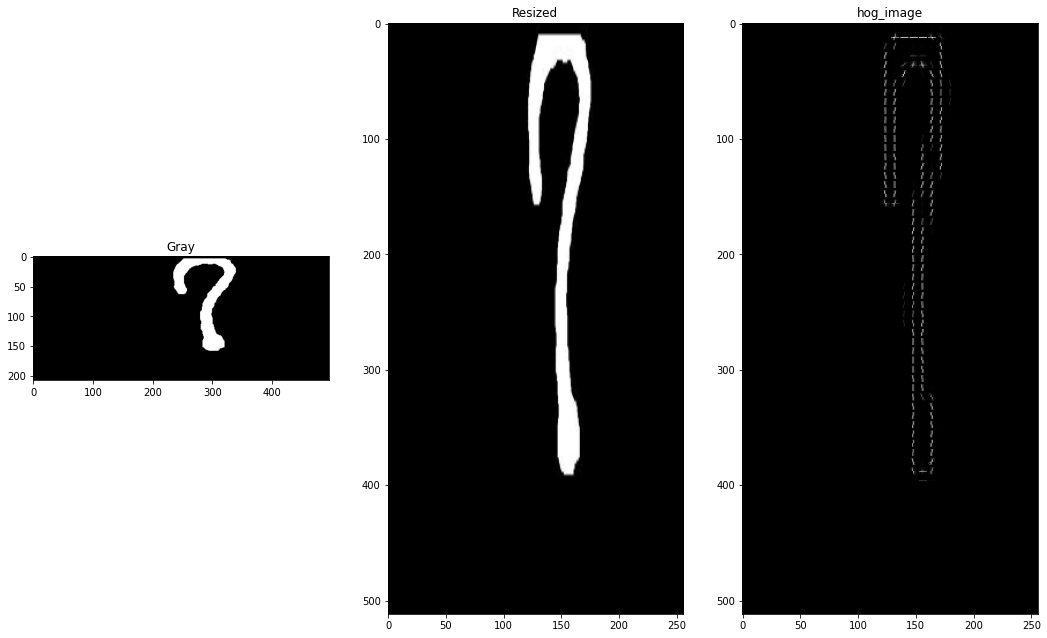

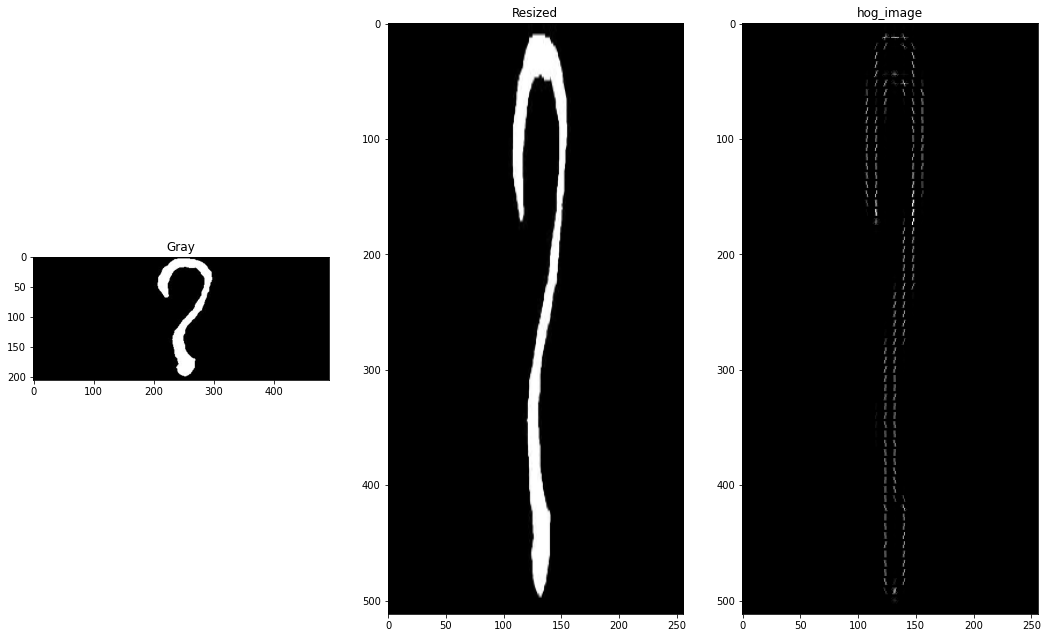

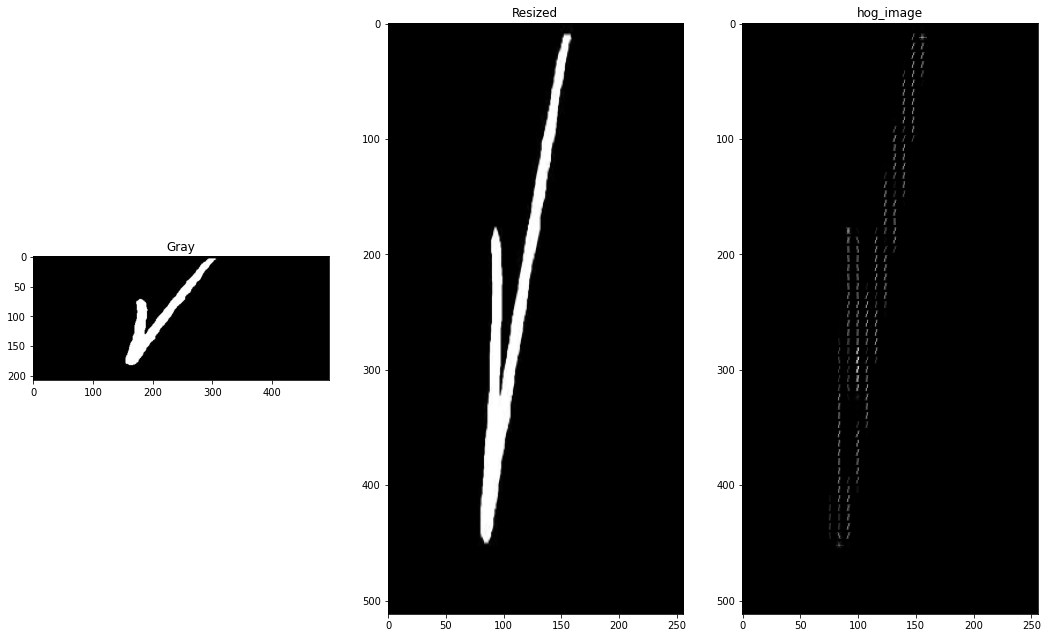

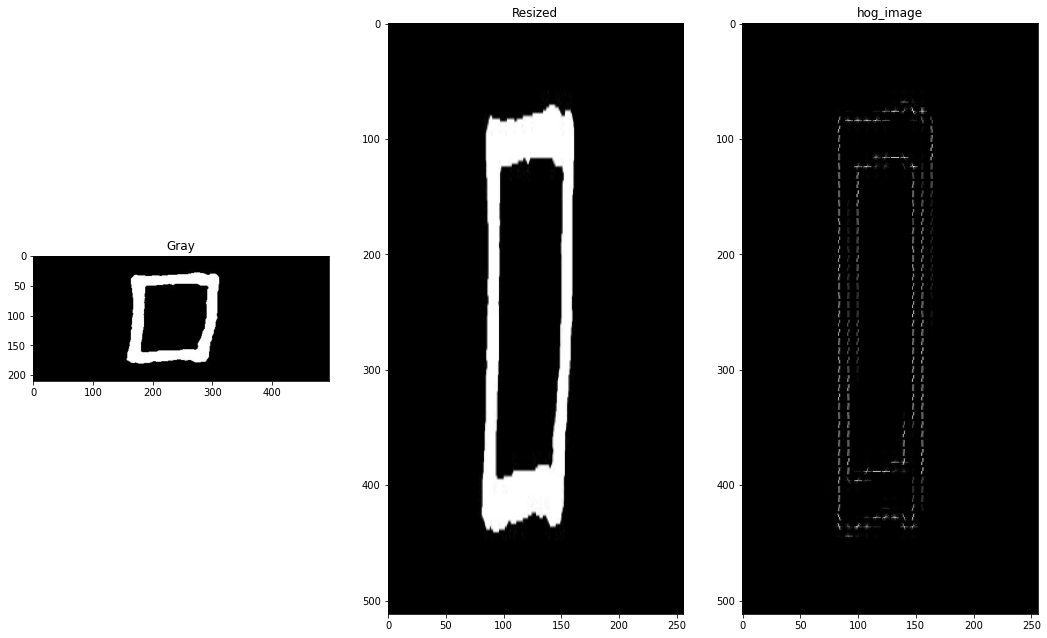

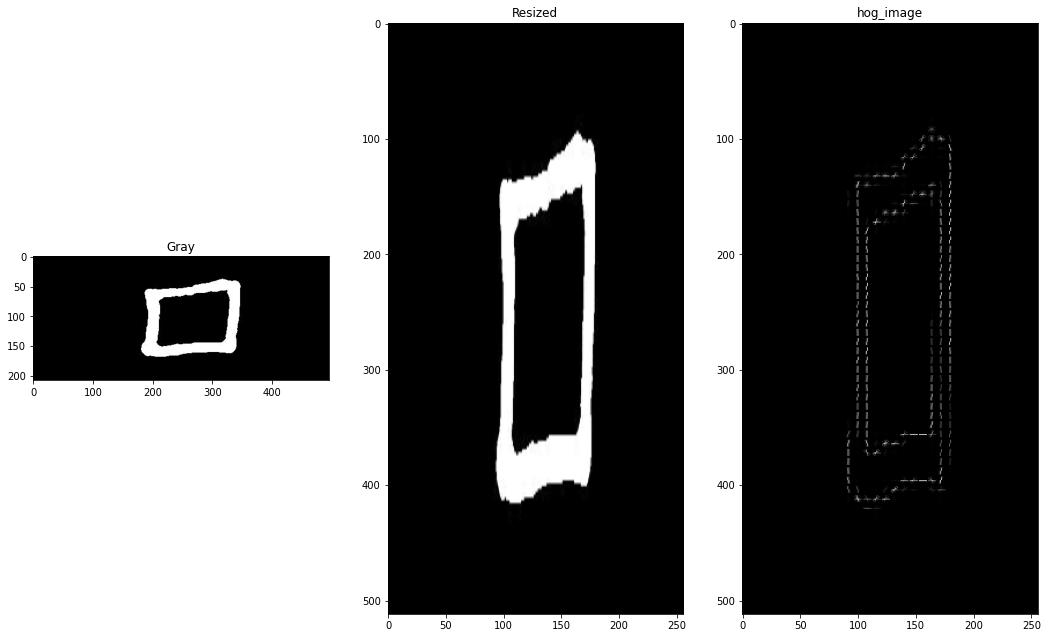

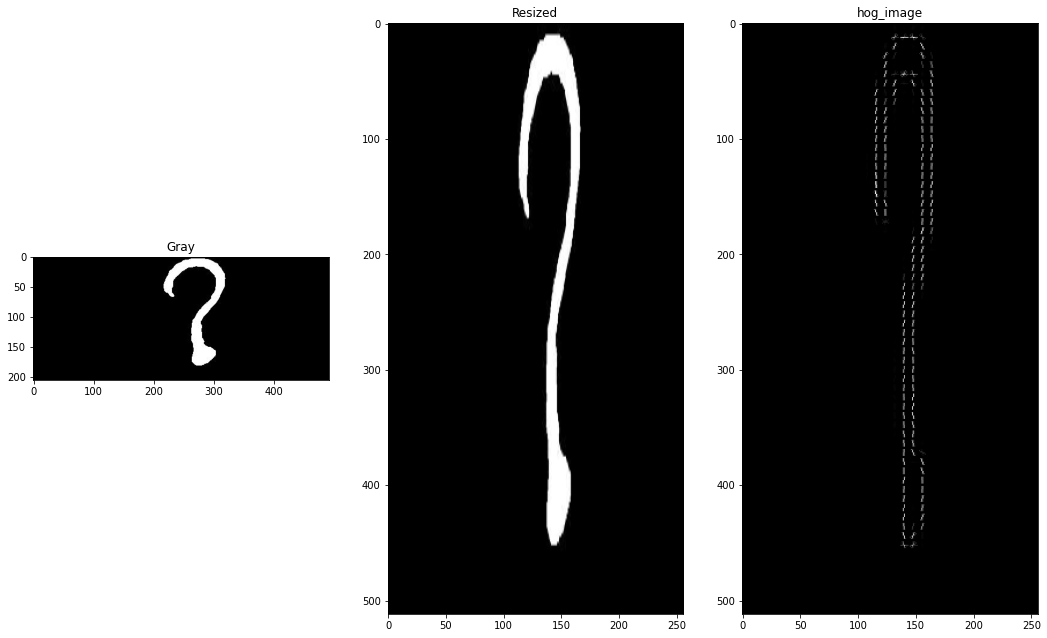

In [4]:
fd_1, hog_image_1=HogFun('./cells/111510.jpg')#tick
fd_2, hog_image_2=HogFun('./cells/111410.jpg')#tick
fd_3, hog_image_3=HogFun('./cells/131020.jpg')#sqaure
fd_4, hog_image_4=HogFun('./cells/131620.jpg')#sqaure
fd_5, hog_image_5=HogFun('./cells/131420.jpg')#sqaure
fd_6, hog_image_6=HogFun('./cells/111610.jpg')#Tick
fd_7, hog_image_7=HogFun('./cells/111420.jpg')#?
fd_8, hog_image_8=HogFun('./cells/111520.jpg')#?
fd_9, hog_image_9=HogFun('./cells/11720.jpg')#?






fd_pred_1, hog_image_pred_1=HogFun('./cells/11810.jpg')#tick
fd_pred_2, hog_image_pred_2=HogFun('./cells/131520.jpg')#square
fd_pred_3, hog_image_pred_3=HogFun('./cells/131220.jpg')#square
fd_pred_4, hog_image_pred_4=HogFun('./cells/11620.jpg')#?





In [5]:
hog_images = [hog_image_1,hog_image_2,hog_image_3,hog_image_4,hog_image_5,hog_image_6,hog_image_7,hog_image_8,hog_image_9]
hog_features =[fd_1,fd_2,fd_3,fd_4,fd_5,fd_6,fd_7,fd_8,fd_9]

In [6]:
labels =  ['tick','tick','square','square','square','tick',"QuestionMark","QuestionMark","QuestionMark"]
print(labels)

['tick', 'tick', 'square', 'square', 'square', 'tick', 'QuestionMark', 'QuestionMark', 'QuestionMark']


In [7]:
#Data Set
# data_frame = np.hstack((hog_features,labels))
# np.random.shuffle(data_frame)

x_train=hog_features
y_train=labels
print(np.shape(x_train))
print(np.shape(y_train))
# print(np.unique(y_train))

# x_train=[[0,1],[1,2]]
# print(np.shape(x_train))
# y_train=['eman','basma']
# print(np.shape(y_train))
# print(np.unique(y_train))

x_test=[fd_pred_1,fd_pred_2,fd_pred_3,fd_pred_4]
# # x_test=[[0,1]]

# Model
model = svm.SVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(y_pred)

(9, 70308)
(9,)
['tick' 'square' 'square' 'QuestionMark']


In [8]:
# print(data_frame)